In [4]:
using Random, JuMP, Gurobi, Plots, Distances

In [5]:
n = 20 # number of locations
Random.seed!(1234)
x_pos = rand(0:10, n)
y_pos = rand(0:10, n);

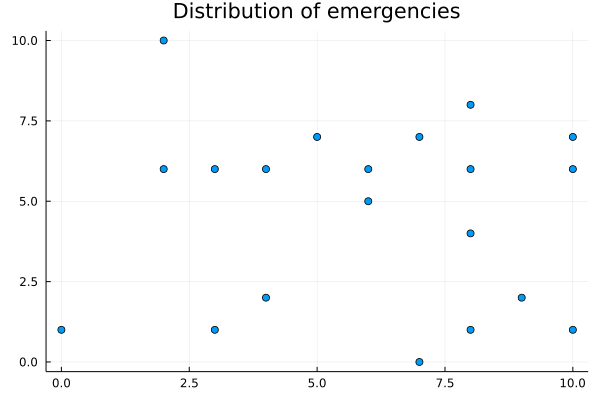

In [6]:
scatter(x_pos, y_pos, title = "Distribution of emergencies", legend = false)

In [7]:
# Parameters

distance = Dict((i,j) => euclidean((x_pos[i], y_pos[i]), (x_pos[j], y_pos[j])) for i = 1:n, j = 1:n);
emergencies = Dict(i => rand(0:10) for i = 1:n);
n_ambulances = 3;

In [8]:
# Sets 
locations = 1:n 
emergency_locations = 1:n;

In [9]:
# Model 
mdl = Model(Gurobi.Optimizer)

# Decision variables
@variable(mdl, x[i in locations, j in emergency_locations], Bin)
@variable(mdl, y[i in locations], Bin);

Set parameter Username
Academic license - for non-commercial use only - expires 2022-07-09


In [10]:
# Objective function

@objective(mdl, Min, sum(distance[i,j] * emergencies[j] * x[i, j] for i in locations, j in emergency_locations));

In [11]:
# Constraints

@constraint(mdl, [j in emergency_locations], sum(x[i,j] for i in locations) == 1);
@constraint(mdl, sum(y[i] for i in locations) <= n_ambulances);
@constraint(mdl, [i in locations, j in emergency_locations], x[i,j] <= y[i] );

In [12]:
# Solving the model 

JuMP.optimize!(mdl)

Z_opt = JuMP.objective_value(mdl)
x_opt = JuMP.value.(x)
y_opt = JuMP.value.(y);

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 421 rows, 420 columns and 1220 nonzeros
Model fingerprint: 0x7b47fe04
Variable types: 0 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.02s
Presolved: 421 rows, 420 columns, 1220 nonzeros
Variable types: 0 continuous, 420 integer (420 binary)
Found heuristic solution: objective 384.6625151

Root relaxation: objective 2.356621e+02, 138 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     235.6621253  235.66213  0.00%     -    0s

Explored 1 nodes (138 simplex iterations) in 0.07 seconds (0.00 work unit

In [13]:
y_opt = [i for i in locations if JuMP.value.(y)[i] >= 0.9]
x_opt = [(i,j) for i in locations, j in emergency_locations if JuMP.value.(x)[i, j] >= 0.9];

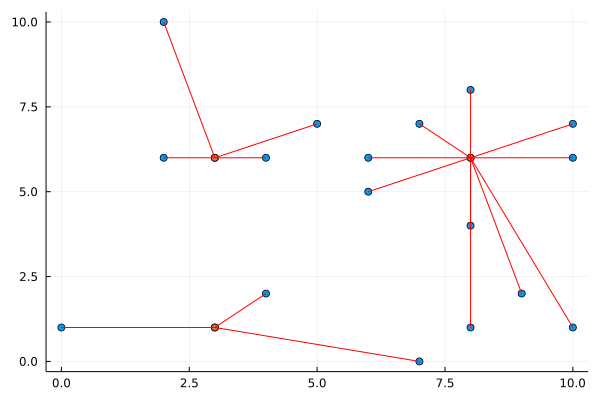

In [14]:
sc1 = scatter(x_pos, y_pos, legend = false)
sc2 = scatter!(x_pos[y_opt], y_pos[y_opt], legend = false)
plot!([[x_pos[x_opt[i][1]], x_pos[x_opt[i][2]]] for i in 1:length(x_opt)], 
[[y_pos[x_opt[i][1]], y_pos[x_opt[i][2]]] for i in 1:length(x_opt)], color="red")
